In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")

In [30]:
#Reading the csv file Mall_Customers.csv
data = pd.read_csv('Mall_Customers.csv')
data.shape

(200, 5)

In [31]:
# The data has 200 entries, that is data from 200 customers.
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'Density')

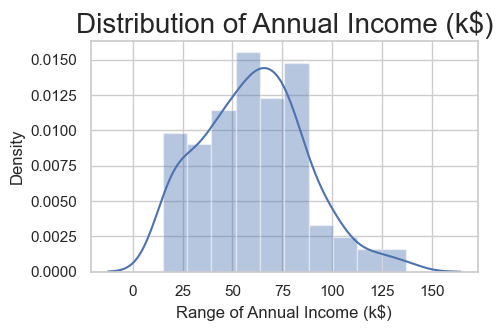

In [32]:
#Distribution of Annnual Income
plt.figure(figsize=(5, 3))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Density')

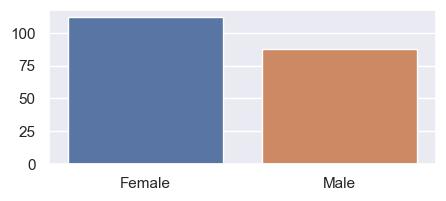

In [33]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(5,2))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [34]:
genders

Female    112
Male       88
Name: Gender, dtype: int64

### K means clustering based on annual income and spending score

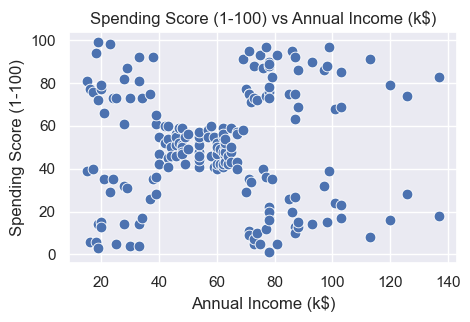

In [35]:
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

#Scatterplot of the input data
plt.figure(figsize=(5,3))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

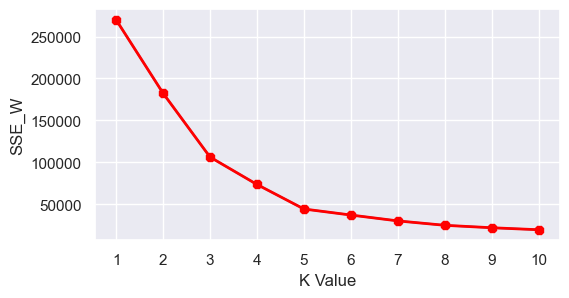

In [36]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

# we choose the k for which SSE_W first starts to diminish

ss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    ss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(6,3))
plt.plot(range(1,11),ss)
plt.plot(range(1,11),ss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSE_W")
plt.show()

In [37]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


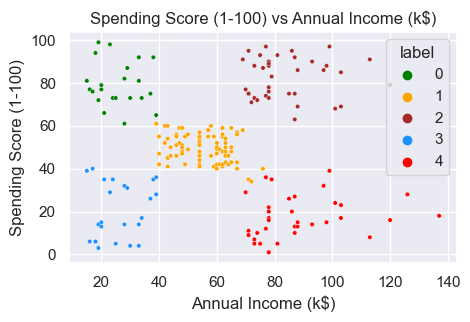

In [39]:
# Scatterplot of the clusters
# The yellow cluster is the customers with the least income and least spending score, similarly, the brown cluster is the customers with the most income and most spending score.

plt.figure(figsize=(5,3))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1, s = 10 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [10]:
df = data.copy()
df.drop(['CustomerID'], inplace = True, axis = 1) 
df.Gender[df.Gender == 'Male'] = 1
df.Gender[df.Gender == 'Female'] = 0
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Gaussian Mixture model clustering

In [40]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)
X = ss.transform(df)

In [41]:
gm = GaussianMixture(
                     n_components = 5,
                     n_init = 10,
                     max_iter = 100)

gm.fit(X)

GaussianMixture(n_components=5, n_init=10)

In [42]:
# Where are the clsuter centers
gm.means_

array([[-0.88640526, -0.96739216, -0.63609582,  0.4337743 ],
       [-0.88640526, -0.4778171 ,  0.96696102,  1.2176089 ],
       [ 1.12815215,  0.74142185,  0.06493816, -0.79530489],
       [ 1.12815215, -0.772635  ,  0.06201402,  0.84702169],
       [-0.88640526,  0.57321427, -0.10227881, -0.55974138]])

In [43]:
# Did algorithm converge?
gm.converged_

True

In [44]:
# Weights of respective gaussians.
gm.weights_

array([0.15611879, 0.10532146, 0.24449094, 0.19550906, 0.29855975])

In [45]:
# Clusters labels
gm.predict(X)

array([3, 3, 4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 4, 0, 2, 3, 4, 3, 2, 0, 2, 3,
       4, 3, 4, 3, 4, 3, 4, 0, 2, 0, 2, 3, 4, 0, 4, 0, 4, 0, 4, 3, 2, 0,
       4, 0, 4, 0, 4, 4, 4, 3, 0, 2, 4, 2, 4, 2, 0, 2, 2, 3, 4, 4, 2, 3,
       4, 4, 3, 0, 2, 4, 4, 4, 2, 3, 4, 2, 0, 4, 2, 2, 2, 4, 0, 2, 4, 0,
       0, 4, 4, 3, 2, 4, 0, 3, 4, 0, 2, 3, 0, 4, 2, 3, 2, 0, 4, 2, 2, 2,
       2, 0, 4, 3, 0, 0, 4, 4, 4, 4, 3, 4, 4, 3, 0, 1, 2, 3, 2, 3, 2, 3,
       0, 1, 2, 1, 4, 3, 2, 1, 4, 3, 0, 1, 2, 3, 2, 1, 4, 3, 2, 3, 4, 1,
       4, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 4, 3, 2, 3, 2, 3, 4, 1,
       2, 3, 2, 3, 4, 1, 2, 1, 4, 3, 4, 3, 4, 1, 4, 1, 2, 1, 4, 1, 4, 3,
       2, 3])

In [54]:
# soft classification, probabilities of data points belonging to clusters
gm.predict_proba(X)[1]

array([0.00000000e+00, 0.00000000e+00, 2.80282877e-06, 9.99997197e-01,
       0.00000000e+00])

In [55]:
# GMM set the clusters not needed with small weights

gm = GaussianMixture(
                     n_components = 10,
                     n_init = 10,
                     max_iter = 100)

gm.fit(X)

np.sort(gm.weights_)

array([0.03992993, 0.06221981, 0.07593588, 0.08997984, 0.09035209,
       0.1006098 , 0.10489044, 0.10535395, 0.11912833, 0.21159993])